# 猫狗大战

这个项目使用tensorflow 1.0 + gpu环境

In [104]:
import tensorflow as tf
from imp import reload
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import random
import os
import traceback
import time
import sys
%matplotlib inline

import image_process
image_process = reload(image_process)

def img_show(imgs, labs):
    size = min(len(imgs), 10)
    fig = plt.figure(figsize=(20, 20))
    for i in range(0, size):
        fig.add_subplot(1, size, i + 1) 
        plt.imshow( imgs[i] + .5 )  # display it
        plt.xlabel( labs[i] )

C:\Program Files\Anaconda2\envs\tensorflow-gpu\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


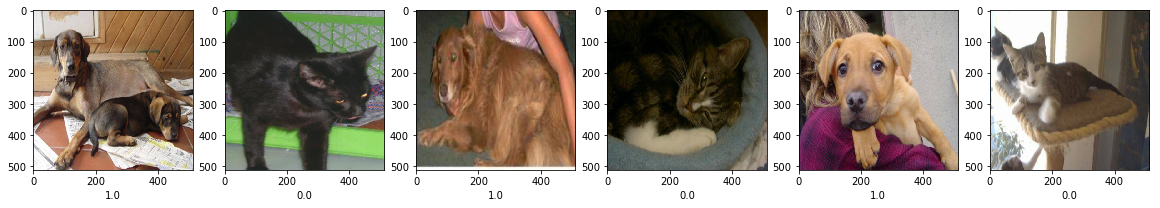

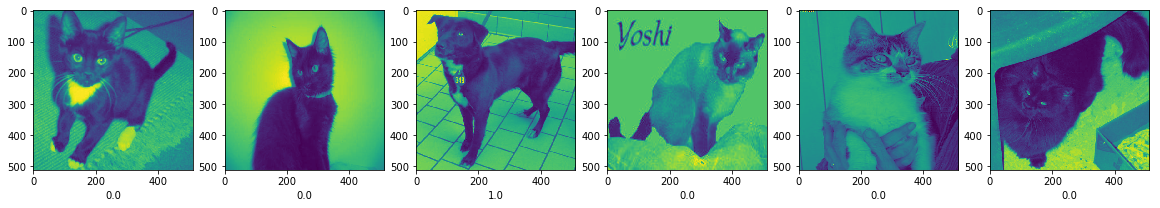

In [107]:
# 列出数据集里的图 
train, vali, test = image_process.read_data_sets('./', batch_size=6)
img_show(*next(train))
# 灰度
train, vali, test = image_process.read_data_sets('./', batch_size=6, gray=True)
img_show(*next(train))

# 使用线性分类

In [10]:
image_process = reload(image_process)
# 重新加载数据集
%time train, vali, test = image_process.read_data_sets('./', batch_size=128)
%time vali_dat, vali_lab = next(vali)
vali_dat = vali_dat.reshape(-1, 512 * 512 * 3)

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(penalty='l1', loss='log')

start = time.time()
try:
    while(True):
        dat, lab = next(train)
        dat = dat.reshape(-1, 512 * 512 * 3)
        clf.partial_fit(dat, lab, [0,1])
        sys.stdout.write('\rscore:' + str(clf.score(vali_dat, vali_lab)))
except Exception as e:
    print('end', e, traceback.format_exc(), str(time.time() - start), 's')
    pass

Wall time: 253 ms


C:\Program Files\Anaconda2\envs\tensorflow-gpu\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Wall time: 2.66 s
score:0.5859375end  Traceback (most recent call last):
  File "<ipython-input-10-87bd8a3b4398>", line 14, in <module>
    dat, lab = next(train)
StopIteration
 164.03864693641663 s


In [11]:
from sklearn.metrics import accuracy_score
train, vali, test = image_process.read_data_sets('./', batch_size=500)
vali_dat, vali_lab = next(vali)
vali_dat = vali_dat.reshape(-1, 512 * 512 * 3)

y_pred = clf.predict(vali_dat)
vali_lab = vali_lab.reshape(-1)
accuracy_score(vali_lab, y_pred)

C:\Program Files\Anaconda2\envs\tensorflow-gpu\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


[1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 

0.57399999999999995

In [ ]:
re.search(r'dog', 'train/dog.2168.jpg') and 1 or 0

In [ ]:
re.search(r'dog', 'train/cat.2168.jpg') and 1 or 0

In [ ]:
class a:
    b=1
    def get(self, s):
        return getattr(self, s)
    
aa=a()
aa.get('b')

In [ ]:
setattr(aa, 'b', +1)
aa.get('b')

In [ ]:
from itertools import chain

def a(f):               
    for i in range(0,5):
        f.write(str(i)) 
        yield i         
        
def b():                          
    with open('1.txt', 'w') as f: 
        for item in a(f):
            yield item
              
bb=b()
bb

In [ ]:
next(bb)

In [ ]:
from itertools import chain

def generator1():
    for item in 'abcdef':
        yield item

def generator2():
    for item in '123456':
        yield item

generator3 = chain(generator1(), generator2())
for item in generator3:
    print(item)b

In [ ]:
a=np.array(['1',])
b=['2']
a or b

In [ ]:
a=np.array([255,0,15])
print((a-255./2)/255.)
a=np.array([255,0,15])
print(a/254-0.5)